In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.sklearn

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import nltk

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\joblib\backports.py:22: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils  # noqa


In [3]:
df = pd.read_csv('./datasets/NMSendataset_preprocessedreviews_second_ngram.csv', error_bad_lines=False);
df

,id,content,recommend,preprocessed_reviews,ngram
0,5f6dd565f4cad2d04e204fbf,"['great', 'comeback']",True,great comeback,"['great', 'comeback']"
1,5f6dd584f4cad2d04e204fc3,"['thank', 'give']",True,thank give,"['thank', 'give']"
2,5f6dd6afae51f158b149a657,"['thank', 'internet', 'historian', 'cool']",True,thank internet historian cool,"['thank', 'internet_historian', 'cool']"
3,5f6e1014e0896bfb2a6117b5,"['real', 'heart', 'team', 'never', 'ever', 'gi...",True,real heart team never ever give like,"['real', 'heart', 'team', 'never', 'ever', 'gi..."
4,5f6e1027e0896bfb2a6117b8,"['never', 'write', 'review', 'anything', 'chan...",True,never write review anything change discover ma...,"['never', 'write', 'review', 'anything', 'chan..."
...,...,...,...,...,...
97993,5f83ee6d42346b555266bd30,"['space', 'engineer', 'destiny', 'no', 'mans',...",True,space engineer destiny mans sky like space lik...,"['space_engineer', 'destiny', 'mans', 'sky', '..."
97994,5f83ee7542346b555266bd34,"['first', 'work', 'fine', 'make', 'feel', 'alo...",False,first work fine make feel alone nice soundtrac...,"['first', 'work', 'fine', 'feel', 'alone', 'ni..."
97995,5f83ee7942346b555266bd36,"['far', 'good', 'edit', 'play', 'least', 'make...",False,far good edit play least make comment feel mar...,"['far', 'good', 'edit', 'play', 'least', 'comm..."
97996,5f83ee7b42346b555266bd37,"['feel', 'like', 'play', 'early', 'alpha', 'pr...",False,feel like play early alpha prerelease many thi...,"['feel', 'like', 'play', 'early_alpha', 'prere..."


In [4]:
eval(df['ngram'][4])

['never',
 'write',
 'review',
 'anything',
 'change',
 'discover',
 'mans',
 'sky',
 'month_ago',
 'originally',
 'bought',
 'play',
 'virtual_reality',
 'quickly',
 'discover',
 'also',
 'enjoyable',
 'personal_computer',
 'get',
 'hang',
 'key',
 'mapping',
 'never',
 'played',
 'console',
 'safe',
 'say',
 'hooked',
 'hour',
 'last',
 'week',
 'look_forward',
 'daily',
 'nexus',
 'mission',
 'one',
 'enough',
 'quicksilver',
 'get',
 'important',
 'item',
 'get',
 'freighter',
 'couple',
 'day',
 'ago',
 'love',
 'fight',
 'year',
 'old',
 'mans',
 'sky',
 'avid',
 'player']

In [5]:
def convert(s):
    s = eval(s)
    s = ' '.join(s)
    return s
df['ngram'] = df['ngram'].apply(convert)

In [6]:
data = df.ngram.values.tolist()
data[:3]

['great comeback', 'thank give', 'thank internet_historian cool']

# Vectorizer

## TF-IDF vectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer(
                                 max_df=500, 
                                   max_features=2000,
                                 min_df=0, 
#                                  stop_words='english',
                                   use_idf=True, 
#                                    token_pattern='[a-zA-Z0-9]{3,}', 
#                                    ngram_range=(1,3)
)

%time tfidf_vectorized = tfidf_vectorizer.fit_transform(data)

print(tfidf_vectorized.shape)

CPU times: total: 2.84 s
Wall time: 2.89 s
(97998, 2000)


In [8]:
tfidf_data_vectorized = tfidf_vectorizer.fit_transform(data)

In [9]:
tfidf_vectorizer.get_feature_names()

['aaa_price',
 'aaa_title',
 'absolutly',
 'absurd',
 'abundant',
 'abysmal',
 'abyss',
 'accept',
 'acceptable',
 'access',
 'accidentally',
 'accomplish',
 'accomplishment',
 'accord',
 'account',
 'accurate',
 'achieve',
 'achievement',
 'acid',
 'acknowledge',
 'acquire',
 'act',
 'action_packed',
 'activate',
 'active',
 'actively',
 'activity',
 'actualy',
 'addictive',
 'additional',
 'additionally',
 'address',
 'adjust',
 'admire',
 'admittedly',
 'advance',
 'advanced',
 'advantage',
 'advertisement',
 'advertising',
 'advice',
 'advise',
 'aesthetic',
 'af',
 'affect',
 'afford',
 'afraid',
 'age',
 'aggressive',
 'agree',
 'ahead',
 'aid',
 'aim',
 'aimlessly',
 'air',
 'akin',
 'ala',
 'albeit',
 'algorithm',
 'alien_language',
 'alien_race',
 'alien_specie',
 'alike',
 'alive',
 'allows',
 'alpha',
 'alright',
 'alt_tab',
 'amazing',
 'amazingly',
 'ambient',
 'ambition',
 'ambitious',
 'among',
 'ancient',
 'anger',
 'angry',
 'animal_plant',
 'animals',
 'animation',
 '

In [10]:
tfidf_data_feature_names=tfidf_vectorizer.get_feature_names()

In [11]:
tfidf_data_dense = tfidf_data_vectorized.todense()
# Compute Sparsicity = Percentage of Non-Zero cells
print("tfidf_Sparsicity: ", ((tfidf_data_dense > 0).sum()/tfidf_data_dense.size)*100, "%")
# Since most cells in this matrix will be zero, I am interested in knowing what percentage of cells contain non-zero values.

tfidf_Sparsicity:  0.20869762648217308 %


## Likelihood

In [12]:
Likelyhood_values = []
limit = 75
start = 5
step = 5
for num_topics in range(start, limit, step):
    print(num_topics)
    lda_model = LatentDirichletAllocation(n_components=num_topics,               # Number of topics
                        max_iter=40,               # Max learning iterations
                        learning_method='batch',   
                        random_state=888,          # Random state
                        batch_size=2,            # n docs in each learning iter
                        evaluate_every = 3,       # compute perplexity every n iters, default: Don't
                        perp_tol  = 0.001,
                        n_jobs = -1,               # Use all available CPUs
                        )
    lda_output = lda_model.fit_transform(tfidf_data_vectorized)
    Likelyhood_values.append(lda_model.score(tfidf_data_vectorized))

5
10
15
20
25
30
35
40
45
50
55
60
65
70


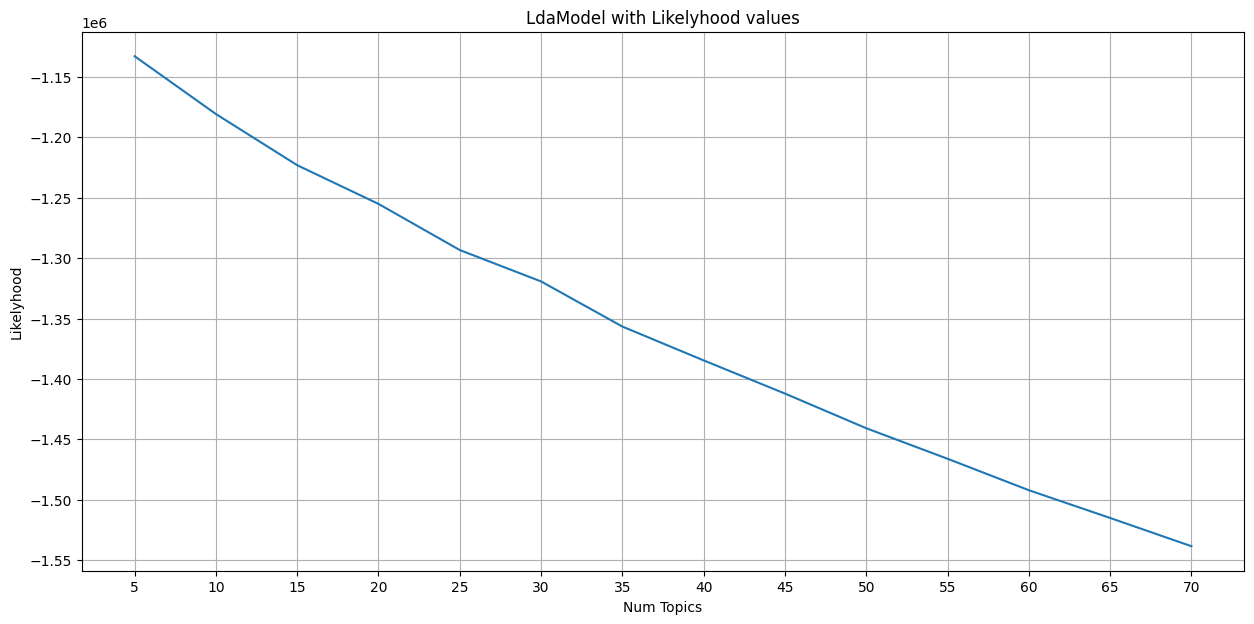

In [24]:
x = range(start, limit, step)
plt.figure(figsize=(15, 7))
plt.plot(x, Likelyhood_values)
plt.xticks(x)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Likelyhood")
plt.title("LdaModel with Likelyhood values")
plt.savefig("datasets/LdaModel with Likelyhood values.png")

In [14]:
Likelyhood_values

[-1132788.5073634407,
 -1180658.085011788,
 -1223041.55157912,
 -1255090.1623353385,
 -1293304.8786724564,
 -1319289.2208313541,
 -1356662.491158796,
 -1384684.0249834023,
 -1412158.385468687,
 -1440851.103133725,
 -1466144.447960903,
 -1492182.2034700373,
 -1515172.095293609,
 -1538564.1309921057]

## perplexity

In [17]:
perplexity_values = []
limit = 75
start = 5
step = 5
for num_topics in range(start, limit, step):
    print(num_topics)
    lda_model = LatentDirichletAllocation(n_components=num_topics,               # Number of topics
                                      max_iter=40,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=888,          # Random state
                                      batch_size=2,            # n docs in each learning iter
                                      evaluate_every = 3,       # compute perplexity every n iters, default: Don't
                                    perp_tol  = 0.001,
                                      n_jobs = -1,               # Use all available CPUs
                                     )
    lda_output = lda_model.fit_transform(tfidf_data_vectorized)
    perplexity_values.append(lda_model.perplexity(tfidf_data_vectorized,sub_sampling=True))

5
10
15
20
25
30
35
40
45
50
55
60
65
70


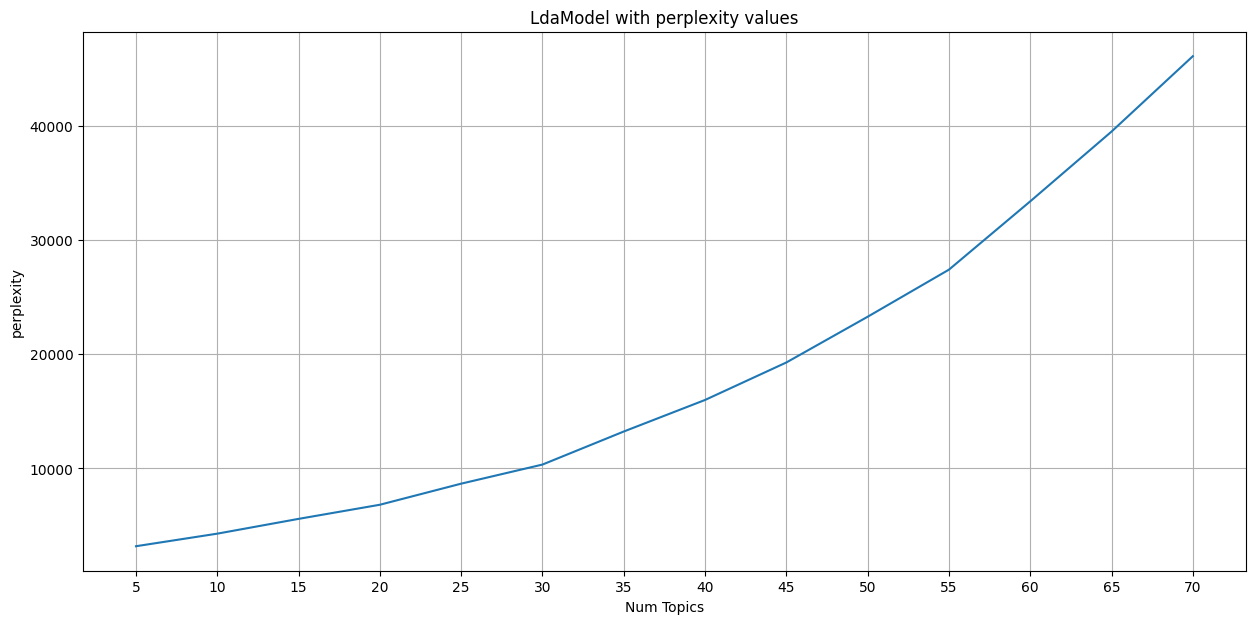

In [25]:
x = range(start, limit, step)
plt.figure(figsize=(15, 7))
plt.plot(x, perplexity_values)
plt.xticks(x)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("perplexity")
plt.title("LdaModel with perplexity values")
plt.savefig("datasets/LdaModel with perplexity values.png")

In [19]:
perplexity_values

[3199.677504954609,
 4298.730450524774,
 5591.753884572086,
 6827.915431410772,
 8671.955677958342,
 10342.088888897968,
 13232.785486467643,
 15992.836825582683,
 19271.017486313664,
 23271.66079726303,
 27390.353586238474,
 33364.8318447889,
 39467.13604984266,
 46059.89340080889]

## coherence 

In [20]:
import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
def topic_model_coherence_generator(topic_num_start=2,
                topic_num_end=12,
                step=2,
                norm_corpus='',
                cv_matrix='',
                cv=''):
    norm_corpus_tokens = [doc.split() for doc in norm_corpus]
    # print(norm_corpus_tokens)
    models = []
    coherence_scores = []

    for i in range(topic_num_start, topic_num_end,step):
        print(i)
        lda_model_best = LatentDirichletAllocation(n_components=5,               # Number of topics
                                           learning_decay=0.9,
                                      max_iter=40,               # Max learning iterations
                                      random_state=888,          # Random state
                                      evaluate_every = 5,       # compute perplexity every n iters, default: Don't
                                    perp_tol  = 0.001,
                                      n_jobs = -1,               # Use all available CPUs
                                     )
        lda_model_best.fit_transform(cv_matrix)
        cur_coherence_score = metric_coherence_gensim(
            measure='c_npmi',
            topic_word_distrib=lda_model_best.components_,
            dtm=cv.fit_transform(norm_corpus),
            vocab=np.array(cv.get_feature_names()),
            texts=norm_corpus_tokens)
        models.append(lda_model_best)
        cur_coherence_score = [i for i in cur_coherence_score if str(i)!='nan']
        # print(cur_coherence_score)
        coherence_scores.append(np.mean(cur_coherence_score))
    return models, coherence_scores

In [21]:
end = 75
start = 5
step = 5
import numpy as np
models, coherence_scores = topic_model_coherence_generator(
    start, end,step, norm_corpus=np.array(data), cv=tfidf_vectorizer, cv_matrix=tfidf_vectorized)

5
10
15
20
25
30
35
40
45
50
55
60
65
70


In [22]:
coherence_scores

[-0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067,
 -0.23320828045961067]

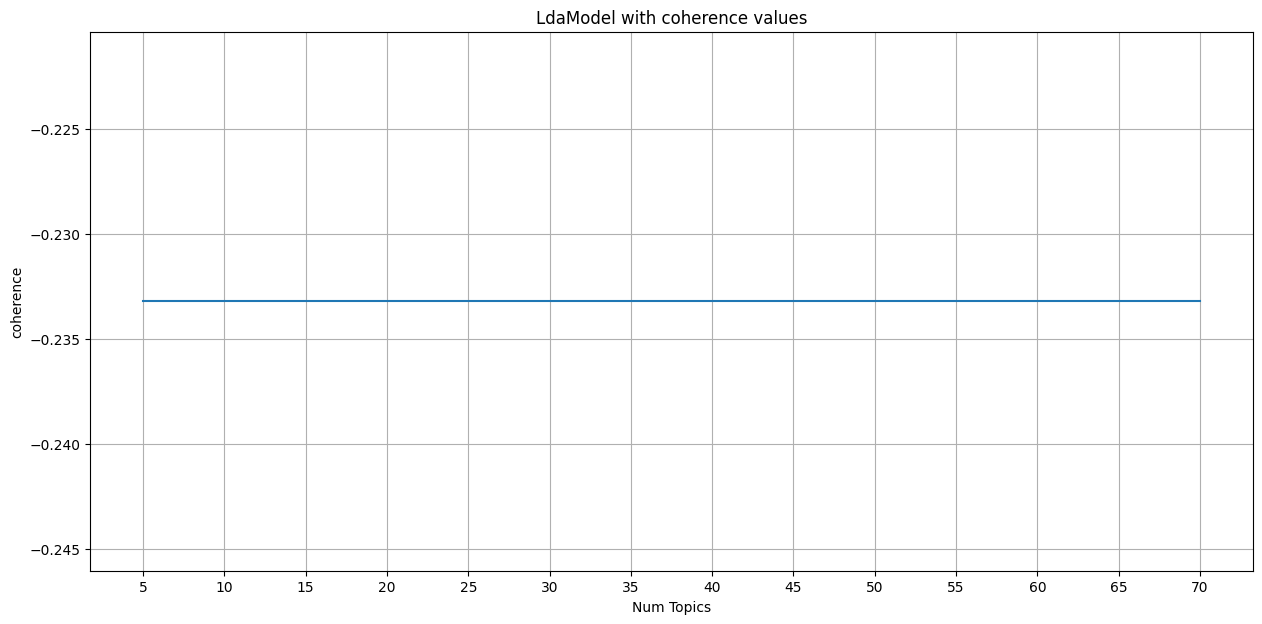

In [26]:
x = range(start, end, step)
plt.figure(figsize=(15, 7))
plt.plot(x, coherence_scores)
plt.xticks(x)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("coherence")
plt.title("LdaModel with coherence values")
plt.savefig("datasets/LdaModel with coherence values c_npmi.png")